# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading  Data

In [2]:
books = pd.read_csv('books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books_data = pd.read_csv('books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings = pd.read_csv('book-ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expec

To Build the Book Recommender System we are using 3 datasets - Books,Ratings and Users

# Books Dataset

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
import pickle
with open('books.pkl','wb') as handle:
    pickle.dump(books, handle)

In [5]:
books.shape

(271360, 8)

In [6]:
books.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [8]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


# Preprocessing Books Dataset

yearOfPublication

In [11]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [12]:
books.loc[books.yearOfPublication == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [13]:
books.loc[books.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [14]:
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [15]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [16]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

In [17]:
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X') | (books.ISBN == '2070426769')]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [18]:
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

In [19]:
print(sorted(books['yearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [20]:
#However, the value 0 is invalid and as this dataset was published in 2004, I have assumed the the years after 2006 to be 
#invalid keeping some margin in case dataset was updated thereafer
#setting invalid years as NaN
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [21]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [22]:
books.yearOfPublication.isnull().sum()

0

Publisher

In [23]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [24]:
books.loc[(books.bookTitle == 'Tyrant Moon'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN


In [25]:
books.loc[(books.bookTitle == 'Finders Keepers'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002.0,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989.0,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993.0,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998.0,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN
134309,0156309505,Finders Keepers,Will,1989.0,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002.0,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003.0,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993.0,Worldwide Library


In [26]:
books.loc[(books.bookAuthor == 'Elaine Corvidae'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001.0,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001.0,Hard Shell Word Factory


In [27]:
books.loc[(books.bookAuthor == 'Linnea Sinclair'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [28]:
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

# Users Dataset

In [29]:
users.shape

(278858, 3)

In [30]:
users.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [31]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [32]:
users.columns = ['userID', 'Location', 'Age']

Checking UserID

In [33]:
users.userID.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

Age

In [34]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [35]:
users.loc[(users.Age > 95) | (users.Age < 5), 'Age'] = np.nan

In [36]:
#replacing NaNs with mean
users.Age = users.Age.fillna(users.Age.mean())

In [37]:
#setting the data type as int
users.Age = users.Age.astype(np.int32)

In [38]:
print(sorted(users.Age.unique()))


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


# Ratings Dataset

In [39]:
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [40]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
ratings.shape

(1149780, 3)

In [42]:
ratings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [43]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [44]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [45]:
#ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset
ratings_new= ratings_new[ratings_new.userID.isin(users.userID)]

In [46]:
n_users = users.shape[0]
n_books = books.shape[0]
print("Number of Users: " + str(n_users))
print("Number of Books: " + str(n_books))

Number of Users: 278858
Number of Books: 271360


In [47]:
#As quoted in the description of the dataset -
#BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 
#higher values denoting higher appreciation, or implicit, expressed by 0
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [48]:
#Hence segragating implicit and explict ratings datasets
explicitRatings = ratings_new[ratings_new.bookRating != 0]
implicitRatings = ratings_new[ratings_new.bookRating == 0]

In [49]:
#checking shapes
print(ratings_new.shape)
print(explicitRatings.shape)
print(implicitRatings.shape)

(1031136, 3)
(383842, 3)
(647294, 3)


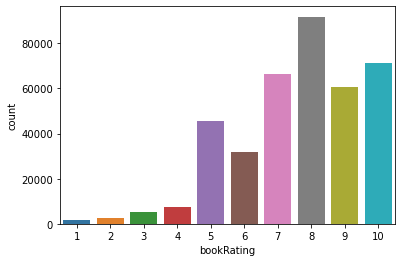

In [50]:
#plotting count of bookRating
sns.countplot(data=explicitRatings , x='bookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

# Recommendations Based On Ratings

In [51]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
popular_books =  pd.merge(rating_count, books, on='ISBN')
popular_books = popular_books.sort_values('bookRating', ascending=False)
popular_books.head()

,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
215952,0971880107,2502,Wild Animus,Rich Shapero,2004.0,Too Far
38570,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
70798,0385504209,883,The Da Vinci Code,Dan Brown,2003.0,Doubleday
7344,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
32370,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA


# Popularity Based Recommendation System

In [52]:
book_rating = pd.merge(ratings, books, on='ISBN')
remove_columns = ['yearOfPublication', 'publisher', 'bookAuthor']
book_rating = book_rating.drop(remove_columns, axis=1)
book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [53]:
book_ratingCount = (book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()


,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [54]:
book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [55]:
rating_with_totalRatingCount = book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [56]:
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= 50')
print(rating_popular_book.shape)
rating_popular_book.head()

(288740, 5)


,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


(1149780, 3)
['userID', 'ISBN', 'bookRating']


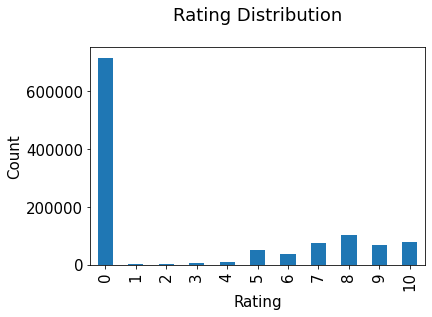

(271360, 5)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']
(278858, 3)
['userID', 'Location', 'Age']


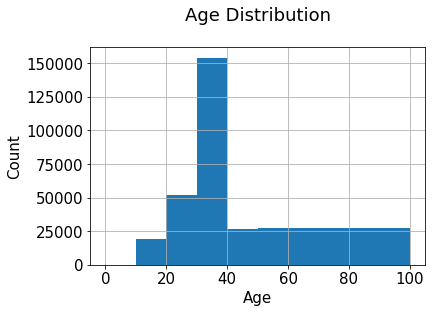

In [57]:
print(ratings.shape)
print(list(ratings.columns))
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
print(books.shape)
print(list(books.columns))
print(users.shape)
print(list(users.columns))
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [58]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


In [59]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [60]:
print(us_canada_user_rating_pivot)

userID                                              8       9       14      \
bookTitle                                                                    
10 Lb. Penalty                                         0.0     0.0     0.0   
16 Lighthouse Road                                     0.0     0.0     0.0   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2010: Odyssey Two                                      0.0     0.0     0.0   
...                                                    ...     ...     ...   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...     0.0     0.0     0.0   
stardust                                               0.0     0

In [61]:
print(us_canada_user_rating_matrix)

  (0, 7067)	5.0
  (0, 11948)	10.0
  (0, 15917)	8.0
  (0, 18525)	8.0
  (0, 19416)	8.0
  (0, 20176)	8.0
  (0, 22783)	8.0
  (0, 28460)	8.0
  (0, 29030)	8.0
  (0, 32468)	6.0
  (0, 33668)	9.0
  (0, 36794)	7.0
  (0, 37750)	6.0
  (1, 4151)	6.0
  (1, 10774)	8.0
  (1, 14026)	9.0
  (1, 14044)	8.0
  (1, 15389)	7.0
  (1, 17764)	5.0
  (1, 19443)	5.0
  (1, 21634)	7.0
  (1, 22201)	8.0
  (1, 24579)	9.0
  (1, 29514)	5.0
  (1, 30480)	5.0
  :	:
  (2440, 35279)	8.0
  (2440, 36063)	7.0
  (2440, 36364)	9.0
  (2440, 37183)	9.0
  (2440, 38685)	8.0
  (2441, 84)	8.0
  (2441, 12779)	10.0
  (2441, 12972)	9.0
  (2441, 15521)	8.0
  (2441, 16421)	8.0
  (2441, 17879)	8.0
  (2441, 20345)	7.0
  (2441, 20526)	9.0
  (2441, 26687)	10.0
  (2441, 26974)	5.0
  (2441, 27971)	8.0
  (2441, 28639)	10.0
  (2441, 30903)	8.0
  (2441, 31280)	5.0
  (2441, 33042)	7.0
  (2441, 33222)	8.0
  (2441, 33586)	7.0
  (2441, 33916)	10.0
  (2441, 39405)	8.0
  (2441, 39550)	7.0


In [62]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [63]:
us_canada_user_rating_pivot.head()

userID,8,9,14,16,17,23,26,32,39,42,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
bookTitle,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
import pickle
with open('recommendbook.pkl','wb') as handle:
    pickle.dump(model_knn, handle)

In [65]:
import pickle
with open('dataset.pkl','wb') as handle:
    pickle.dump(us_canada_user_rating_pivot, handle)

In [66]:
def searchBook(book):
    for i in range(2442):
        if(us_canada_user_rating_pivot.index[i]==book):
            return i
    return -1

In [ ]:
book = input("Enter the Name Of The Book : ")
val = searchBook(book)
if val == -1:
    print("No such Book exist")
else:
    distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[val, :].values.reshape(1, -1), n_neighbors = 6)
    distances = distances.flatten()
    indices = indices.flatten()
    print('Following are the recommendations for ' + us_canada_user_rating_pivot.index[val])
    print()
    for i in range(1,6):
        print(str(us_canada_user_rating_pivot.index[indices[i]])+" with distance of "+str(distances[i]))